In [4]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()

In [5]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
import random

In [6]:
import shap
shap.initjs()

In [7]:
subject = 'Paraná - Consumo de Cimento (t)'
split_index = 12 #Referente aos 13 anos de input  

In [12]:
data = pd.read_csv('../../Inputs Atuais/2008_01_model_input_PR.csv')
data = data[[col for col in data.columns if col != subject] + [subject]] #Seta consumo (target) para a coluna final
data = data.drop('Paraná - Produção de Cimento (t)', axis=1)
data

,Ano,Paraná - Desemprego,Paraná - IDH,Paraná - IDH Renda,Paraná - PIB - Estadual,Paraná - PIB - Construção Civil,Paraná - PIB - Per Capita,Paraná - PIB - Preços de Mercado,Paraná - IDH Educacao,Paraná - IDH Longevidade,...,NFSP - Porcentagem do PIB (%),Taxa Selic (%),Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),Paraná - Consumo de Cimento (t)
0,2008,8.033948,0.782138,0.768548,2.148670e+08,1.122835e+07,17.780948,1.878837e+08,0.745648,0.834122,...,2.868108,11.760983,17.558665,912.624708,1226.296848,18.012164,13.653739,78.027482,2.236583,3001.521000
1,2009,8.063370,0.782910,0.767137,2.163260e+08,1.133139e+07,17.787925,1.879466e+08,0.748601,0.835310,...,2.305885,9.472585,16.652522,912.466179,1217.653383,17.954863,13.668549,78.238643,2.155189,3092.068000
2,2010,8.026843,0.783594,0.766111,2.218671e+08,1.138377e+07,17.886000,1.893914e+08,0.751387,0.835940,...,1.958246,9.332485,17.928528,912.482023,1194.060192,17.703414,13.001948,76.311573,2.092804,3749.448000
3,2011,8.013806,0.784190,0.765458,2.270561e+08,1.138563e+07,17.967281,1.906364e+08,0.753998,0.836020,...,2.079088,10.985689,18.661309,912.629463,1182.416452,17.710041,12.630186,74.615878,2.043995,4174.942000
4,2012,6.472496,0.784389,0.764921,2.317175e+08,1.133915e+07,18.011636,1.916091e+08,0.755977,0.835445,...,2.183282,8.159014,19.310061,912.778766,1176.491125,17.874291,12.612094,73.865245,1.941425,4522.969000
5,2013,7.011799,0.785421,0.765581,2.358269e+08,1.122742e+07,18.040420,1.923917e+08,0.759142,0.834565,...,2.403445,7.913561,19.233593,912.914618,1170.878793,18.105264,12.720105,73.487865,1.844730,4578.716000
6,2014,7.462443,0.785706,0.765963,2.386532e+08,1.115283e+07,18.028052,1.924772e+08,0.760987,0.833112,...,2.748397,10.350442,20.725057,912.973266,1150.562966,18.275455,13.157699,74.605015,1.851460,4341.821857
7,2015,7.813261,0.785515,0.766043,2.410111e+08,1.107686e+07,18.031270,1.926648e+08,0.762152,0.831122,...,2.501529,12.454398,22.054778,913.057535,1145.712487,18.177724,13.346348,75.170150,1.905966,4108.786286
8,2016,7.840669,0.788366,0.758774,2.424341e+08,1.101317e+07,18.026717,1.926914e+08,0.771114,0.838386,...,2.073464,13.111908,22.315526,913.132268,1158.573328,18.115048,13.261122,74.043778,1.933375,3869.334857
9,2017,7.553100,0.787582,0.759026,2.428100e+08,1.097443e+07,18.022550,1.926406e+08,0.770943,0.835784,...,2.177386,9.479812,21.977949,913.165670,1160.957791,18.281050,13.470416,73.546507,1.889856,3764.518000


In [13]:
input_data = data.iloc[:-2, 1:-1]
input_data

,Paraná - Desemprego,Paraná - IDH,Paraná - IDH Renda,Paraná - PIB - Estadual,Paraná - PIB - Construção Civil,Paraná - PIB - Per Capita,Paraná - PIB - Preços de Mercado,Paraná - IDH Educacao,Paraná - IDH Longevidade,Contratação Comercial (Bi R$),...,NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),Taxa Selic (%),Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s)
0,8.033948,0.782138,0.768548,2.148670e+08,1.122835e+07,17.780948,1.878837e+08,0.745648,0.834122,5.483335e+08,...,-7723.574973,2.868108,11.760983,17.558665,912.624708,1226.296848,18.012164,13.653739,78.027482,2.236583
1,8.063370,0.782910,0.767137,2.163260e+08,1.133139e+07,17.787925,1.879466e+08,0.748601,0.835310,5.302764e+08,...,-8961.781709,2.305885,9.472585,16.652522,912.466179,1217.653383,17.954863,13.668549,78.238643,2.155189
2,8.026843,0.783594,0.766111,2.218671e+08,1.138377e+07,17.886000,1.893914e+08,0.751387,0.835940,5.046425e+08,...,-9895.682385,1.958246,9.332485,17.928528,912.482023,1194.060192,17.703414,13.001948,76.311573,2.092804
3,8.013806,0.784190,0.765458,2.270561e+08,1.138563e+07,17.967281,1.906364e+08,0.753998,0.836020,4.854622e+08,...,-9989.170714,2.079088,10.985689,18.661309,912.629463,1182.416452,17.710041,12.630186,74.615878,2.043995
4,6.472496,0.784389,0.764921,2.317175e+08,1.133915e+07,18.011636,1.916091e+08,0.755977,0.835445,4.867661e+08,...,-9429.326328,2.183282,8.159014,19.310061,912.778766,1176.491125,17.874291,12.612094,73.865245,1.941425
5,7.011799,0.785421,0.765581,2.358269e+08,1.122742e+07,18.040420,1.923917e+08,0.759142,0.834565,5.225848e+08,...,-7157.441850,2.403445,7.913561,19.233593,912.914618,1170.878793,18.105264,12.720105,73.487865,1.844730
6,7.462443,0.785706,0.765963,2.386532e+08,1.115283e+07,18.028052,1.924772e+08,0.760987,0.833112,5.676413e+08,...,-3453.461327,2.748397,10.350442,20.725057,912.973266,1150.562966,18.275455,13.157699,74.605015,1.851460
7,7.813261,0.785515,0.766043,2.410111e+08,1.107686e+07,18.031270,1.926648e+08,0.762152,0.831122,5.179392e+08,...,-1442.919387,2.501529,12.454398,22.054778,913.057535,1145.712487,18.177724,13.346348,75.170150,1.905966
8,7.840669,0.788366,0.758774,2.424341e+08,1.101317e+07,18.026717,1.926914e+08,0.771114,0.838386,4.524144e+08,...,-3128.377228,2.073464,13.111908,22.315526,913.132268,1158.573328,18.115048,13.261122,74.043778,1.933375
9,7.553100,0.787582,0.759026,2.428100e+08,1.097443e+07,18.022550,1.926406e+08,0.770943,0.835784,4.213689e+08,...,-5386.337108,2.177386,9.479812,21.977949,913.165670,1160.957791,18.281050,13.470416,73.546507,1.889856


In [14]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-1)
target_data

0     3092.068000
1     3749.448000
2     4174.942000
3     4522.969000
4     4578.716000
5     4341.821857
6     4108.786286
7     3869.334857
8     3764.518000
9     3773.354000
10    3786.974000
11    4235.532000
12    4784.413000
13    4538.256000
14            NaN
Name: Paraná - Consumo de Cimento (t), dtype: float64

In [15]:
# input para treinamento
train_input = (input_data.iloc[:-1] - np.mean(input_data.iloc[:-1], axis=0)) / np.std(input_data.iloc[:-1], axis=0)
train_input

,Paraná - Desemprego,Paraná - IDH,Paraná - IDH Renda,Paraná - PIB - Estadual,Paraná - PIB - Construção Civil,Paraná - PIB - Per Capita,Paraná - PIB - Preços de Mercado,Paraná - IDH Educacao,Paraná - IDH Longevidade,Contratação Comercial (Bi R$),...,NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),Taxa Selic (%),Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s)
0,0.954430,-1.699678,1.331277,-1.806944,0.348365,-2.042958,-1.906928,-1.621982,-0.042462,1.204752,...,-0.569731,2.026352,0.984445,-1.266771,-0.975425,1.940409,-0.268956,1.137644,1.835993,2.079287
1,1.017927,-1.261317,0.939993,-1.661370,1.009092,-1.965533,-1.871184,-1.293295,0.429908,0.820657,...,-0.838980,0.085558,-0.051710,-1.745665,-1.582298,1.579454,-0.539264,1.176616,1.956737,1.461930
2,0.939098,-0.873574,0.655199,-1.108495,1.345008,-0.877208,-1.049479,-0.983091,0.680031,0.275392,...,-1.042057,-1.114490,-0.115145,-1.071300,-1.521642,0.594192,-1.725446,-0.577589,0.854816,0.988761
3,0.910963,-0.535386,0.474312,-0.590757,1.356922,0.024771,-0.341452,-0.692424,0.712066,-0.132596,...,-1.062386,-0.697344,0.633403,-0.684027,-0.957222,0.107944,-1.694185,-1.555909,-0.114802,0.618558
4,-2.415320,-0.422527,0.325283,-0.125660,1.058841,0.516968,0.211766,-0.472052,0.483303,-0.104860,...,-0.940648,-0.337667,-0.646476,-0.341164,-0.385670,-0.139500,-0.919352,-1.603519,-0.544022,-0.159410
5,-1.251457,0.163252,0.508405,0.284361,0.342383,0.836388,0.656850,-0.119710,0.133711,0.657046,...,-0.446625,0.422337,-0.757614,-0.381577,0.134391,-0.373874,0.170234,-1.319280,-0.759813,-0.892823
6,-0.278927,0.325010,0.614316,0.566357,-0.135907,0.699136,0.705450,0.085716,-0.443735,1.615453,...,0.358807,1.613108,0.345772,0.406656,0.358905,-1.222272,0.973093,-0.167721,-0.121014,-0.841773
7,0.478169,0.216545,0.636582,0.801625,-0.623089,0.734849,0.812173,0.215483,-1.234902,0.558230,...,0.796000,0.760923,1.298413,1.109410,0.681498,-1.424830,0.512055,0.328724,0.202137,-0.428361
8,0.537319,1.834498,-1.380170,0.943598,-1.031518,0.684323,0.827306,1.213246,1.652199,-0.835563,...,0.429496,-0.716758,1.596124,1.247214,0.967586,-0.887756,0.216390,0.104443,-0.441935,-0.220470
9,-0.083280,1.389158,-1.310222,0.981108,-1.279958,0.638087,0.798387,1.194161,0.618336,-1.495939,...,-0.061498,-0.358019,-0.048438,1.068806,1.095455,-0.788179,0.999483,0.655217,-0.726280,-0.550555


In [16]:
# Alvo para treinamento
train_target = target_data.iloc[:split_index]
train_target

0     3092.068000
1     3749.448000
2     4174.942000
3     4522.969000
4     4578.716000
5     4341.821857
6     4108.786286
7     3869.334857
8     3764.518000
9     3773.354000
10    3786.974000
11    4235.532000
Name: Paraná - Consumo de Cimento (t), dtype: float64

In [17]:
#input de test (Ano 2021)
test_input = ((input_data - np.mean(input_data, axis=0)) / np.std(input_data, axis=0)).iloc[-1:]
test_input

,Paraná - Desemprego,Paraná - IDH,Paraná - IDH Renda,Paraná - PIB - Estadual,Paraná - PIB - Construção Civil,Paraná - PIB - Per Capita,Paraná - PIB - Preços de Mercado,Paraná - IDH Educacao,Paraná - IDH Longevidade,Contratação Comercial (Bi R$),...,NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),Taxa Selic (%),Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s)
12,-0.734266,-1.069894,-1.42466,0.465024,-0.914446,-0.223777,0.114326,1.035451,-2.637193,1.108405,...,0.964765,-1.482779,-2.260447,0.964616,0.339314,-0.540552,0.224215,0.839814,-2.237536,-1.155068


In [18]:
# Alvo de test (Ano 2021)
test_target = target_data.iloc[split_index:-2]
test_target

12    4784.413
Name: Paraná - Consumo de Cimento (t), dtype: float64

In [49]:
# Rede neural feed-forward com optmizador Estocástico
def neural_network_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(2048, activation='tanh', input_shape=(train_input.shape[1],)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1024, activation='tanh'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1024, activation='tanh'),
        tf.keras.layers.Dense(128, activation='tanh'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error')   
    history = model.fit(train_input, 
                        train_target, 
                        epochs=10000,
                        validation_data=(train_input.iloc[-1:], train_target.iloc[-1:]),
                        callbacks=[early_stopping], 
                        verbose=want_verbose)
    return model, history

In [20]:
def get_a_good_seed(train_input, train_target, test_target, test_input):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(100)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = neural_network_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][500:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")

    return winner_seed

In [31]:
winner_seed = 3235850340

In [32]:
trained_model, history = neural_network_model(train_input, train_target, want_verbose=1, seed=winner_seed)

Epoch 1/10000
1/1 [==============================] - 0s 453ms/step - loss: 16155888.0000 - val_loss: 17624040.0000
Epoch 2/10000
1/1 [==============================] - 0s 14ms/step - loss: 15866475.0000 - val_loss: 19917684.0000
Epoch 3/10000
1/1 [==============================] - 0s 14ms/step - loss: 15461312.0000 - val_loss: 18934222.0000
Epoch 4/10000
1/1 [==============================] - 0s 14ms/step - loss: 15421293.0000 - val_loss: 17412136.0000
Epoch 5/10000
1/1 [==============================] - 0s 13ms/step - loss: 14843343.0000 - val_loss: 18013650.0000
Epoch 6/10000
1/1 [==============================] - 0s 14ms/step - loss: 14430413.0000 - val_loss: 16882392.0000
Epoch 7/10000
1/1 [==============================] - 0s 14ms/step - loss: 14306564.0000 - val_loss: 16697080.0000
Epoch 8/10000
1/1 [==============================] - 0s 15ms/step - loss: 13754237.0000 - val_loss: 15605424.0000
Epoch 9/10000
1/1 [==============================] - 0s 14ms/step - loss: 13635180.0000

1/1 [==============================] - 0s 13ms/step - loss: 3695461.7500 - val_loss: 5879880.0000
Epoch 74/10000
1/1 [==============================] - 0s 13ms/step - loss: 3613061.2500 - val_loss: 5901412.0000
Epoch 75/10000
1/1 [==============================] - 0s 13ms/step - loss: 3538828.7500 - val_loss: 5784199.0000
Epoch 76/10000
1/1 [==============================] - 0s 13ms/step - loss: 3460980.7500 - val_loss: 5586689.5000
Epoch 77/10000
1/1 [==============================] - 0s 13ms/step - loss: 3384319.2500 - val_loss: 5645473.5000
Epoch 78/10000
1/1 [==============================] - 0s 14ms/step - loss: 3368902.2500 - val_loss: 5494644.0000
Epoch 79/10000
1/1 [==============================] - 0s 13ms/step - loss: 3242408.7500 - val_loss: 5384090.5000
Epoch 80/10000
1/1 [==============================] - 0s 13ms/step - loss: 3243719.2500 - val_loss: 5392373.5000
Epoch 81/10000
1/1 [==============================] - 0s 13ms/step - loss: 3155963.2500 - val_loss: 5056806.500

1/1 [==============================] - 0s 13ms/step - loss: 420917.5000 - val_loss: 903387.1250
Epoch 218/10000
1/1 [==============================] - 0s 13ms/step - loss: 408984.3438 - val_loss: 895865.0000
Epoch 219/10000
1/1 [==============================] - 0s 13ms/step - loss: 408282.6562 - val_loss: 906325.3750
Epoch 220/10000
1/1 [==============================] - 0s 13ms/step - loss: 408473.7188 - val_loss: 880063.8750
Epoch 221/10000
1/1 [==============================] - 0s 13ms/step - loss: 391096.3750 - val_loss: 865617.6250
Epoch 222/10000
1/1 [==============================] - 0s 13ms/step - loss: 400775.0000 - val_loss: 886471.0000
Epoch 223/10000
1/1 [==============================] - 0s 13ms/step - loss: 401313.2812 - val_loss: 850982.3750
Epoch 224/10000
1/1 [==============================] - 0s 13ms/step - loss: 400190.2500 - val_loss: 866111.5000
Epoch 225/10000
1/1 [==============================] - 0s 13ms/step - loss: 384297.5000 - val_loss: 856756.3125
Epoch 22

1/1 [==============================] - 0s 14ms/step - loss: 163677.0312 - val_loss: 287291.2812
Epoch 364/10000
1/1 [==============================] - 0s 13ms/step - loss: 178622.7344 - val_loss: 302738.2500
Epoch 365/10000
1/1 [==============================] - 0s 13ms/step - loss: 170783.3438 - val_loss: 279482.3438
Epoch 366/10000
1/1 [==============================] - 0s 13ms/step - loss: 170809.8125 - val_loss: 283823.8750
Epoch 367/10000
1/1 [==============================] - 0s 13ms/step - loss: 167298.7656 - val_loss: 282314.2500
Epoch 368/10000
1/1 [==============================] - 0s 13ms/step - loss: 180655.8281 - val_loss: 259036.0156
Epoch 369/10000
1/1 [==============================] - 0s 14ms/step - loss: 172684.4062 - val_loss: 296890.3750
Epoch 370/10000
1/1 [==============================] - 0s 13ms/step - loss: 171824.5469 - val_loss: 264257.2500
Epoch 371/10000
1/1 [==============================] - 0s 13ms/step - loss: 167041.9531 - val_loss: 279069.4688
Epoch 37

1/1 [==============================] - 0s 13ms/step - loss: 149133.8906 - val_loss: 147554.8281
Epoch 510/10000
1/1 [==============================] - 0s 18ms/step - loss: 148170.1094 - val_loss: 139434.7812
Epoch 511/10000
1/1 [==============================] - 0s 14ms/step - loss: 150592.5781 - val_loss: 152289.9219
Epoch 512/10000
1/1 [==============================] - 0s 13ms/step - loss: 151363.1250 - val_loss: 142834.1719
Epoch 513/10000
1/1 [==============================] - 0s 13ms/step - loss: 145633.8906 - val_loss: 144427.4688
Epoch 514/10000
1/1 [==============================] - 0s 19ms/step - loss: 151380.3594 - val_loss: 129381.7734
Epoch 515/10000
1/1 [==============================] - 0s 14ms/step - loss: 151514.8906 - val_loss: 156164.8594
Epoch 516/10000
1/1 [==============================] - 0s 13ms/step - loss: 152012.8750 - val_loss: 156532.8594
Epoch 517/10000
1/1 [==============================] - 0s 13ms/step - loss: 145622.4219 - val_loss: 137944.9531
Epoch 51

1/1 [==============================] - 0s 13ms/step - loss: 147142.7188 - val_loss: 139076.0000
Epoch 656/10000
1/1 [==============================] - 0s 14ms/step - loss: 148147.7344 - val_loss: 133556.7031
Epoch 657/10000
1/1 [==============================] - 0s 14ms/step - loss: 148809.7969 - val_loss: 133463.3906
Epoch 658/10000
1/1 [==============================] - 0s 13ms/step - loss: 148009.3281 - val_loss: 134676.8125
Epoch 659/10000
1/1 [==============================] - 0s 13ms/step - loss: 146901.7344 - val_loss: 133475.7031
Epoch 660/10000
1/1 [==============================] - 0s 13ms/step - loss: 147358.0625 - val_loss: 139594.9062
Epoch 661/10000
1/1 [==============================] - 0s 13ms/step - loss: 148031.2344 - val_loss: 130422.1953
Epoch 662/10000
1/1 [==============================] - 0s 13ms/step - loss: 147522.2031 - val_loss: 134068.0781
Epoch 663/10000
1/1 [==============================] - 0s 13ms/step - loss: 146408.3906 - val_loss: 134945.5625
Epoch 66

1/1 [==============================] - 0s 13ms/step - loss: 141801.6406 - val_loss: 135103.4531
Epoch 802/10000
1/1 [==============================] - 0s 13ms/step - loss: 139874.8281 - val_loss: 157046.5625
Epoch 803/10000
1/1 [==============================] - 0s 13ms/step - loss: 138935.5938 - val_loss: 162324.7969
Epoch 804/10000
1/1 [==============================] - 0s 13ms/step - loss: 142621.8281 - val_loss: 156272.9375
Epoch 805/10000
1/1 [==============================] - 0s 13ms/step - loss: 151955.0156 - val_loss: 139837.4688
Epoch 806/10000
1/1 [==============================] - 0s 13ms/step - loss: 157430.4219 - val_loss: 151509.6719
Epoch 807/10000
1/1 [==============================] - 0s 13ms/step - loss: 148838.1406 - val_loss: 156746.9844
Epoch 808/10000
1/1 [==============================] - 0s 13ms/step - loss: 151517.6094 - val_loss: 134858.0312
Epoch 809/10000
1/1 [==============================] - 0s 13ms/step - loss: 154685.6406 - val_loss: 141104.7812
Epoch 81

1/1 [==============================] - 0s 13ms/step - loss: 150284.6406 - val_loss: 128402.5469
Epoch 948/10000
1/1 [==============================] - 0s 13ms/step - loss: 142366.0625 - val_loss: 134793.6719
Epoch 949/10000
1/1 [==============================] - 0s 13ms/step - loss: 155097.4531 - val_loss: 137292.1406
Epoch 950/10000
1/1 [==============================] - 0s 13ms/step - loss: 152608.6875 - val_loss: 130472.9922
Epoch 951/10000
1/1 [==============================] - 0s 13ms/step - loss: 152242.6406 - val_loss: 133579.0000
Epoch 952/10000
1/1 [==============================] - 0s 14ms/step - loss: 147988.8906 - val_loss: 139161.0625
Epoch 953/10000
1/1 [==============================] - 0s 13ms/step - loss: 146548.3594 - val_loss: 129241.1250
Epoch 954/10000
1/1 [==============================] - 0s 13ms/step - loss: 145662.6250 - val_loss: 137506.2500
Epoch 955/10000
1/1 [==============================] - 0s 13ms/step - loss: 149705.9844 - val_loss: 125811.5391
Epoch 95

1/1 [==============================] - 0s 14ms/step - loss: 147361.2344 - val_loss: 131024.0234
Epoch 1021/10000
1/1 [==============================] - 0s 13ms/step - loss: 146562.2969 - val_loss: 128601.9062
Epoch 1022/10000
1/1 [==============================] - 0s 13ms/step - loss: 145661.9844 - val_loss: 129870.1406
Epoch 1023/10000
1/1 [==============================] - 0s 13ms/step - loss: 148050.0156 - val_loss: 120257.9141
Epoch 1024/10000
1/1 [==============================] - 0s 13ms/step - loss: 151158.6562 - val_loss: 130636.0078
Epoch 1025/10000
1/1 [==============================] - 0s 13ms/step - loss: 142928.2500 - val_loss: 136264.2656
Epoch 1026/10000
1/1 [==============================] - 0s 13ms/step - loss: 147125.8281 - val_loss: 126762.4219
Epoch 1027/10000
1/1 [==============================] - 0s 13ms/step - loss: 145378.8906 - val_loss: 133594.7188
Epoch 1028/10000
1/1 [==============================] - 0s 13ms/step - loss: 150655.7031 - val_loss: 129707.6016


1/1 [==============================] - 0s 13ms/step - loss: 146259.7031 - val_loss: 126466.0156
Epoch 1165/10000
1/1 [==============================] - 0s 13ms/step - loss: 144261.4844 - val_loss: 141373.4375
Epoch 1166/10000
1/1 [==============================] - 0s 13ms/step - loss: 145350.2969 - val_loss: 134101.1562
Epoch 1167/10000
1/1 [==============================] - 0s 13ms/step - loss: 150801.3281 - val_loss: 129449.2266
Epoch 1168/10000
1/1 [==============================] - 0s 13ms/step - loss: 146452.3750 - val_loss: 132216.9219
Epoch 1169/10000
1/1 [==============================] - 0s 13ms/step - loss: 152226.2656 - val_loss: 134165.5312
Epoch 1170/10000
1/1 [==============================] - 0s 13ms/step - loss: 151346.5156 - val_loss: 135767.2344
Epoch 1171/10000
1/1 [==============================] - 0s 13ms/step - loss: 151228.8281 - val_loss: 131576.5781
Epoch 1172/10000
1/1 [==============================] - 0s 13ms/step - loss: 163514.5781 - val_loss: 120746.0703


1/1 [==============================] - 0s 13ms/step - loss: 150410.6094 - val_loss: 129806.4531
Epoch 1309/10000
1/1 [==============================] - 0s 13ms/step - loss: 148388.8594 - val_loss: 129489.8047
Epoch 1310/10000
1/1 [==============================] - 0s 13ms/step - loss: 147893.7344 - val_loss: 114949.3047
Epoch 1311/10000
1/1 [==============================] - 0s 13ms/step - loss: 150940.8906 - val_loss: 133897.5625
Epoch 1312/10000
1/1 [==============================] - 0s 14ms/step - loss: 143215.2188 - val_loss: 126853.7109
Epoch 1313/10000
1/1 [==============================] - 0s 13ms/step - loss: 148600.3125 - val_loss: 122930.0156
Epoch 1314/10000
1/1 [==============================] - 0s 13ms/step - loss: 150045.3281 - val_loss: 133119.6875
Epoch 1315/10000
1/1 [==============================] - 0s 13ms/step - loss: 148037.7188 - val_loss: 125577.3125
Epoch 1316/10000
1/1 [==============================] - 0s 13ms/step - loss: 148264.0469 - val_loss: 127428.0859


1/1 [==============================] - 0s 13ms/step - loss: 161245.8125 - val_loss: 105934.1953
Epoch 1453/10000
1/1 [==============================] - 0s 13ms/step - loss: 150216.3906 - val_loss: 133848.7969
Epoch 1454/10000
1/1 [==============================] - 0s 13ms/step - loss: 146475.2500 - val_loss: 112201.4453
Epoch 1455/10000
1/1 [==============================] - 0s 13ms/step - loss: 144532.3281 - val_loss: 133467.1406
Epoch 1456/10000
1/1 [==============================] - 0s 13ms/step - loss: 147504.0156 - val_loss: 121632.6953
Epoch 1457/10000
1/1 [==============================] - 0s 13ms/step - loss: 155112.4375 - val_loss: 112220.0938
Epoch 1458/10000
1/1 [==============================] - 0s 13ms/step - loss: 142459.2031 - val_loss: 135865.3125
Epoch 1459/10000
1/1 [==============================] - 0s 13ms/step - loss: 156122.1406 - val_loss: 98509.0859
Epoch 1460/10000
1/1 [==============================] - 0s 13ms/step - loss: 148914.3281 - val_loss: 116616.5781
E

1/1 [==============================] - 0s 13ms/step - loss: 156413.5156 - val_loss: 98694.4531
Epoch 1597/10000
1/1 [==============================] - 0s 13ms/step - loss: 159408.3281 - val_loss: 114128.3359
Epoch 1598/10000
1/1 [==============================] - 0s 13ms/step - loss: 151768.3906 - val_loss: 107412.2188
Epoch 1599/10000
1/1 [==============================] - 0s 13ms/step - loss: 148638.6406 - val_loss: 115467.5547
Epoch 1600/10000
1/1 [==============================] - 0s 13ms/step - loss: 145648.2031 - val_loss: 117963.4062
Epoch 1601/10000
1/1 [==============================] - 0s 12ms/step - loss: 143231.8125 - val_loss: 121877.5234
Epoch 1602/10000
1/1 [==============================] - 0s 13ms/step - loss: 150506.3906 - val_loss: 107389.5000
Epoch 1603/10000
1/1 [==============================] - 0s 14ms/step - loss: 148179.0000 - val_loss: 117826.0938
Epoch 1604/10000
1/1 [==============================] - 0s 14ms/step - loss: 149813.6094 - val_loss: 112659.7109
E

1/1 [==============================] - 0s 13ms/step - loss: 147460.4219 - val_loss: 113885.3203
Epoch 1741/10000
1/1 [==============================] - 0s 13ms/step - loss: 150820.3125 - val_loss: 117361.9453
Epoch 1742/10000
1/1 [==============================] - 0s 13ms/step - loss: 147400.7031 - val_loss: 116988.5469
Epoch 1743/10000
1/1 [==============================] - 0s 13ms/step - loss: 147450.6250 - val_loss: 114050.3281
Epoch 1744/10000
1/1 [==============================] - 0s 13ms/step - loss: 147449.6094 - val_loss: 114516.4766
Epoch 1745/10000
1/1 [==============================] - 0s 13ms/step - loss: 147431.4219 - val_loss: 114821.7031
Epoch 1746/10000
1/1 [==============================] - 0s 13ms/step - loss: 147395.7344 - val_loss: 115214.5000
Epoch 1747/10000
1/1 [==============================] - 0s 13ms/step - loss: 147438.1719 - val_loss: 114557.7891
Epoch 1748/10000
1/1 [==============================] - 0s 13ms/step - loss: 147360.1719 - val_loss: 117958.2031


1/1 [==============================] - 0s 13ms/step - loss: 151210.9531 - val_loss: 102863.3359
Epoch 1885/10000
1/1 [==============================] - 0s 13ms/step - loss: 148193.1719 - val_loss: 125131.4609
Epoch 1886/10000
1/1 [==============================] - 0s 13ms/step - loss: 147426.9531 - val_loss: 116283.0000
Epoch 1887/10000
1/1 [==============================] - 0s 13ms/step - loss: 147359.0000 - val_loss: 116401.5781
Epoch 1888/10000
1/1 [==============================] - 0s 13ms/step - loss: 147341.0781 - val_loss: 118479.3203
Epoch 1889/10000
1/1 [==============================] - 0s 13ms/step - loss: 147335.6719 - val_loss: 116629.5859
Epoch 1890/10000
1/1 [==============================] - 0s 13ms/step - loss: 147462.7344 - val_loss: 121187.2734
Epoch 1891/10000
1/1 [==============================] - 0s 13ms/step - loss: 147503.4844 - val_loss: 120292.7969
Epoch 1892/10000
1/1 [==============================] - 0s 13ms/step - loss: 147327.2969 - val_loss: 117728.8984


1/1 [==============================] - 0s 13ms/step - loss: 147329.2031 - val_loss: 117788.3828
Epoch 2029/10000
1/1 [==============================] - 0s 13ms/step - loss: 147316.5625 - val_loss: 117913.4297
Epoch 2030/10000
1/1 [==============================] - 0s 13ms/step - loss: 151155.0781 - val_loss: 102729.3281
Epoch 2031/10000
1/1 [==============================] - 0s 13ms/step - loss: 148079.6406 - val_loss: 124418.6094
Epoch 2032/10000
1/1 [==============================] - 0s 13ms/step - loss: 147338.5469 - val_loss: 118842.1250
Epoch 2033/10000
1/1 [==============================] - 0s 13ms/step - loss: 150909.2656 - val_loss: 101345.0781
Epoch 2034/10000
1/1 [==============================] - 0s 13ms/step - loss: 148009.1094 - val_loss: 123372.2734
Epoch 2035/10000
1/1 [==============================] - 0s 13ms/step - loss: 147383.7031 - val_loss: 116180.4531
Epoch 2036/10000
1/1 [==============================] - 0s 13ms/step - loss: 147352.9531 - val_loss: 116787.3906


In [33]:
trained_model.save('model_sp.keras')

In [34]:
prediction = trained_model.predict(test_input)
print(f"{test_target.values}(test_target) - {prediction}(prediction) = {mean_absolute_error(test_target, prediction)}")

1/1 [==============================] - 0s 34ms/step
[4784.413](test_target) - [[4147.2935]](prediction) = 637.1195429687496


In [35]:
def f(X):
    model = tf.keras.models.load_model('model_sp.keras')
    return model.predict(X)

In [88]:
def shap_explainer(train_input, test_input, test_target):
    explainer = shap.KernelExplainer(f, pd.DataFrame(np.zeros((1, len(train_input.columns.tolist()))), columns=test_input.columns))
    shap_values = explainer.shap_values(test_input)
    exp = shap.Explanation(shap_values[0], explainer.expected_value, test_input, feature_names=test_input.columns)
    display(shap_values[0])
    display(shap.waterfall_plot(exp[0]))
    return shap_values[0][0], explainer

def shap_team_reward(exp, sv, test_target, prediction):
    if abs((test_target.values - prediction[0])[0])/test_target.values < 0.05:
        return np.abs(sv)      
    else:
        if exp.expected_value > test_target.values:
            display("exp.expected_value > test_target.value")
            sv = (-1)*sv
            display(sv)
    sv[sv == 0.0] = (test_target.values - prediction[0])[0]/50
    return sv 

def shap_abs(exp, sv, test_target, prediction):
    return np.abs(sv) 

def shap_omission_penaltier(exp, sv, test_target, prediction):
    sv[sv == 0.0] = -abs((test_target.values - prediction[0])[0])
    return sv 

1/1 [==============================] - 0s 33ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 525us/step


array([[ -77.18746508,  -52.31980167,  140.37605781,   30.77679743,
        -145.37245502,  -27.29603864,   26.03872859,   43.34730243,
        -190.32721743,  -82.92680627,    0.        , -122.08513278,
          22.59630426,   61.92426514,  -61.93785406,    0.        ,
          46.49178699,  -29.3231379 ,  107.54143347,   74.60912569,
         -73.10691095,   82.32895632,  -67.30342305,    0.        ,
          16.42064665,   77.76271527,   40.65549026,   60.57339741,
          10.82100359,  -22.56167096, -149.97487258,    0.        ,
         166.75072962,   95.76002543,   67.1045712 ,   53.04994824,
          63.09627348,  -37.0101519 ,  -54.49078091,  -69.040153  ,
          40.7511011 ,    0.        ,   15.85493256,   47.7385806 ,
          48.03927736,  -63.55104201,    0.        ,  -94.07472768,
         -84.10099555,  107.79738813,  -68.21479754,  -69.91128995,
          77.8982977 ,  -46.50273931,   89.15167674,   27.74170657,
          49.94779111,   78.98082226,   97.93245

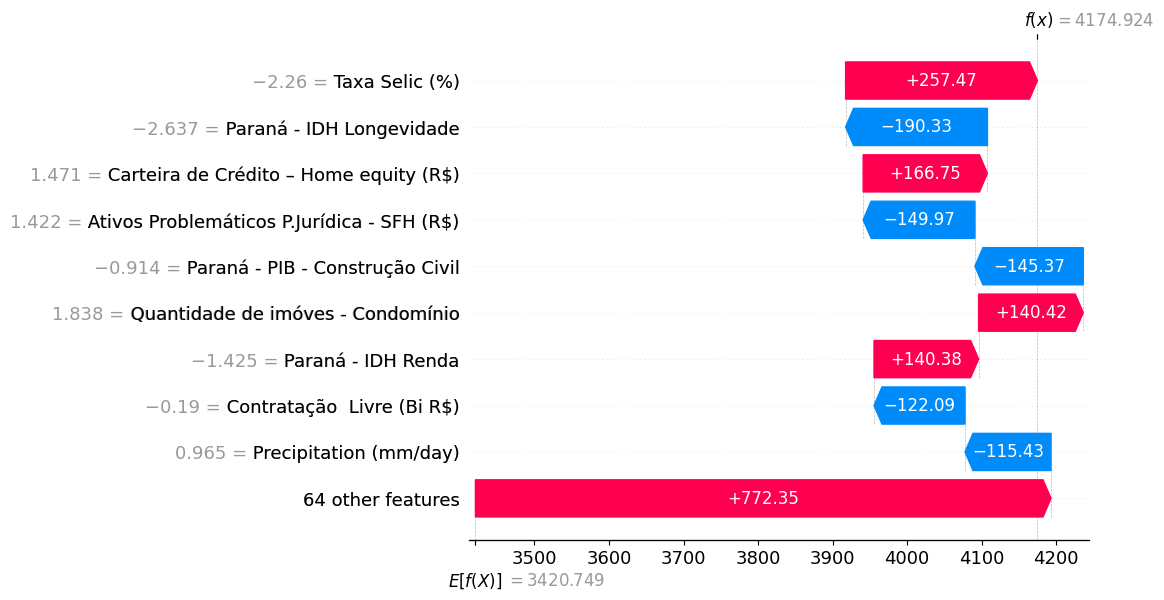

None

In [89]:
explainer = shap.KernelExplainer(f, pd.DataFrame(np.zeros((1, len(train_input.columns.tolist()))), columns=test_input.columns))
shap_values = explainer.shap_values(test_input)
exp = shap.Explanation(shap_values[0], explainer.expected_value, test_input, feature_names=test_input.columns)

display(shap_values[0])
display(shap.force_plot(explainer.expected_value, shap_values[0], test_input))
display(shap.waterfall_plot(exp[0]))

In [90]:
def model_time_series_mae_tester(data, window, seed):
    if window > 2:
        
        # Copia e organiza data geral
        predictions = []
        targets = []
        shap_calc = []
        data_copy = data.copy()
        data_copy[subject] = data[subject].shift(-1)
        data_copy = data_copy.iloc[:-1,1:]
        
        input_df = data_copy.iloc[:, :-1]
        target_df = data_copy.iloc[:, -1:]

        for i in range(window, len(data_copy) + 1):
            
            train_input = input_df.iloc[:i - 1]
            train_input = (train_input - np.mean(train_input, axis=0)) / np.std(train_input, axis=0)
            
            train_target = target_df.iloc[:i - 1]


            test_input = input_df.iloc[:i]
            test_input = ((test_input - np.mean(test_input, axis=0)) / np.std(test_input, axis=0)).iloc[-1:]
            
            test_target = target_df.iloc[i - 1:i]

            model, hitory = neural_network_model(train_input, train_target, want_verbose=0, seed=seed)
            model.save('model_sp.keras')
            
            prediction = model.predict(test_input)
            shap_calc_values, exp = shap_explainer(train_input, test_input, test_target)
            
            predictions.append(prediction[0].item())
            targets.append(test_target.iloc[0, 0])
            
            
            shap_calc.append(shap_team_reward(exp, shap_calc_values, test_target, prediction))
            
            print(f"{test_target.values}(test_target) - {prediction}(prediction) = {(test_target.values - prediction[0])[0]}")
            display("-------------------------------------------------------------------")

        return predictions, targets, np.sum(shap_calc, axis=0)

1/1 [==============================] - 0s 33ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 500us/step


array([[ 0.        ,  3.44501405,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , 45.82292881,  0.        ,  0.        ,
        49.53886254, 17.73816244, 13.19673247,  0.        ,  0.        ,
         0.        , 55.58966751,  0.        ,  0.        ,  0.        ,
         0.        , 25.52704124,  0.        ,  0.        ,  0.        ,
        36.94096199,  0.        , 26.36978977, 21.28138822,  7.51730474,
        48.68632446,  3.27593575,  0.        , 28.95796561,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  3.6738898 ,  6.81470048,  2.10480062, 38.37401803,
         0.        , 19.23498565, 12.48648734,  2.54957514,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        16.38101201,  0.        , 32.87955928,  0.        ,  0.        ,
         0.        ,  0.        , 33.22754092, 32.25076045, 53.46435122,
         0.        ,  0.        ,  0.        , 44.7

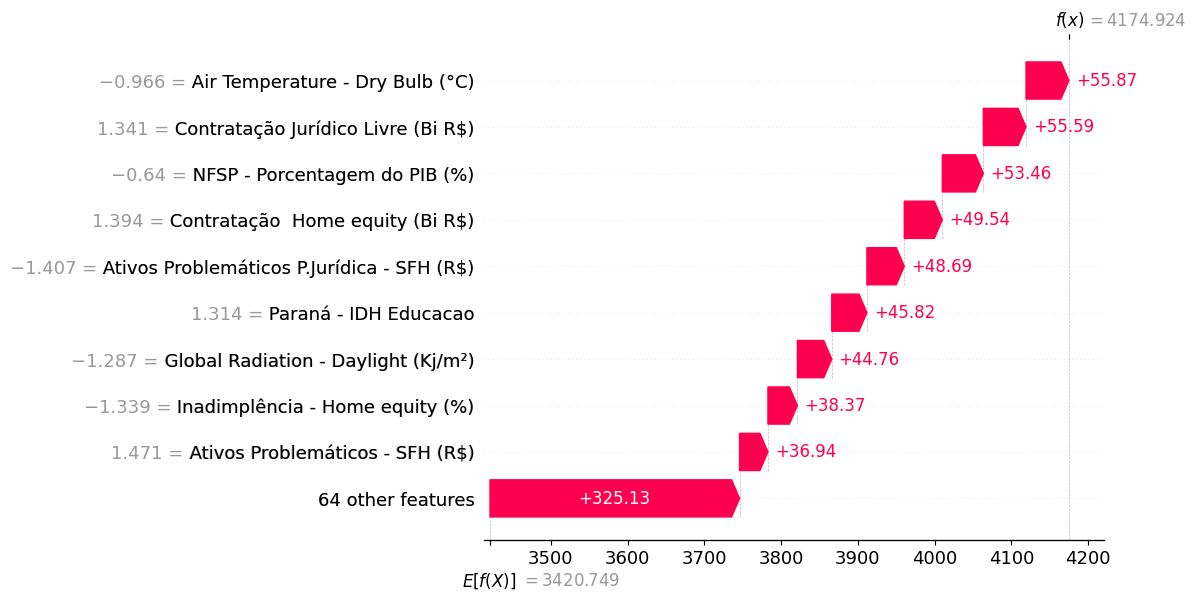

None

[[4522.969]](test_target) - [[4174.924]](prediction) = [348.04517188]


'-------------------------------------------------------------------'

1/1 [==============================] - 0s 35ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 527us/step


array([[  0.        ,   0.        ,  -2.18288116,   0.        ,
          0.        , -37.09824724,   0.        , -48.18352021,
          0.        ,   0.        , -62.65499784, -50.22719097,
        -43.73910292,   0.        ,   0.        ,  -4.19210368,
        -65.85247912,   0.        , -21.27878559, -12.07885172,
         -6.08462322, -35.375232  ,   0.        ,   0.        ,
        -41.53207696, -45.42407121,   0.        , -65.7705122 ,
        -56.88320394, -45.9614226 , -33.49134297,   0.        ,
          0.        , -40.68520971,   0.        ,   0.        ,
        -11.97883059,   0.        ,  -3.77835595,   0.        ,
          0.        , -28.10798787,  -3.75634769, -26.20704106,
        -45.96521714, -10.87956984, -20.26088631, -60.04509408,
         -3.87934108, -37.93018218,   0.        ,   0.        ,
          0.        ,   0.        , -25.03189223, -32.77041656,
        -11.2339028 , -44.2148172 ,  -8.42480746,   0.        ,
        -13.51348343,   0.        , -43.

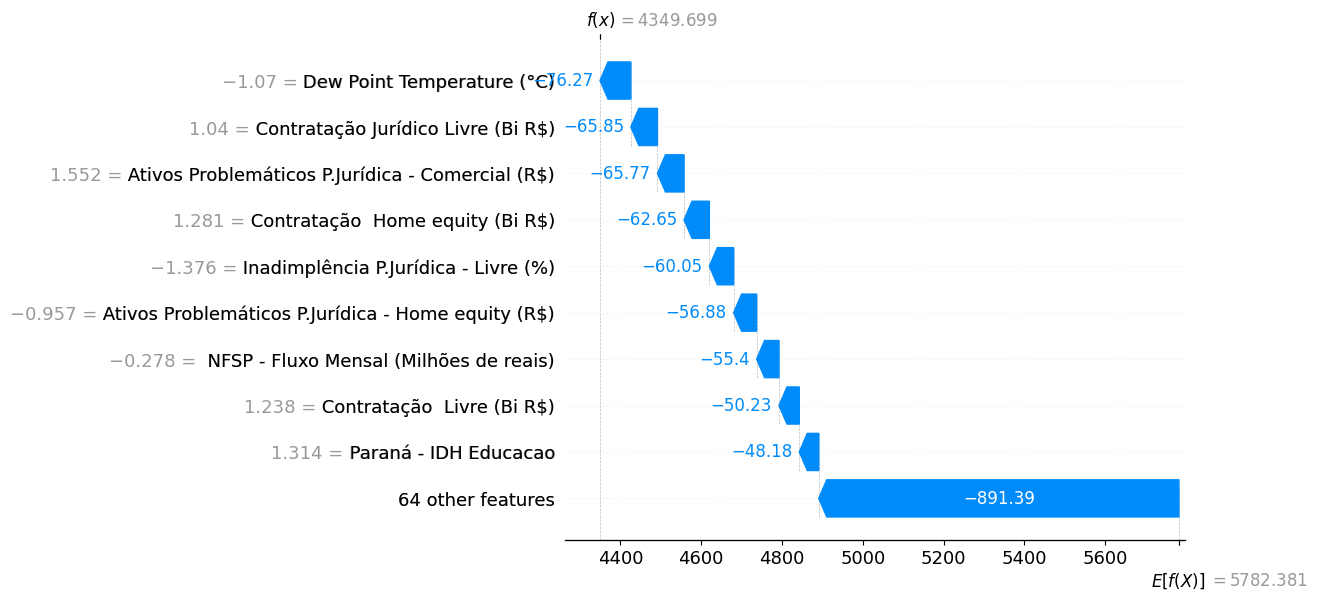

None

'exp.expected_value > test_target.value'

array([-0.        , -0.        ,  2.18288116, -0.        , -0.        ,
       37.09824724, -0.        , 48.18352021, -0.        , -0.        ,
       62.65499784, 50.22719097, 43.73910292, -0.        , -0.        ,
        4.19210368, 65.85247912, -0.        , 21.27878559, 12.07885172,
        6.08462322, 35.375232  , -0.        , -0.        , 41.53207696,
       45.42407121, -0.        , 65.7705122 , 56.88320394, 45.9614226 ,
       33.49134297, -0.        , -0.        , 40.68520971, -0.        ,
       -0.        , 11.97883059, -0.        ,  3.77835595, -0.        ,
       -0.        , 28.10798787,  3.75634769, 26.20704106, 45.96521714,
       10.87956984, 20.26088631, 60.04509408,  3.87934108, 37.93018218,
       -0.        , -0.        , -0.        , -0.        , 25.03189223,
       32.77041656, 11.2339028 , 44.2148172 ,  8.42480746, -0.        ,
       13.51348343, -0.        , 43.31181164, 55.40296246, 22.99158825,
       -0.        , -0.        , -0.        , 33.43620306, 33.26

[[4578.716]](test_target) - [[4349.6987]](prediction) = [229.01726953]


'-------------------------------------------------------------------'

1/1 [==============================] - 0s 34ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 554us/step


array([[-23.97678308,  11.57620917,  12.10403518,  11.70453285,
        -39.29646645,  25.49918463,   7.94389947,  28.2453043 ,
        -42.91225147,  12.768133  ,   5.17140823,  25.2966791 ,
         16.31297573,   8.8649442 ,  18.14348482, -49.95517551,
          0.        , -47.60680123,  13.34143135,  24.38471601,
        -11.71256472,  14.16109354, -43.4540588 , -65.35959965,
        -10.20306832,   7.95830379,   7.17907894,  33.72689034,
        -14.37913505,  19.01134388,  13.25821078, -29.00372431,
          3.77418062,  15.82926607,   9.9854906 ,  15.06406794,
         24.51607137, -20.42785012,  11.43182764,   9.66233161,
          0.        , -28.95846254,   6.61555374,  19.68257683,
          0.        ,  19.76141031, -56.98437731,   2.84387163,
         23.90200991,  11.16142585,  22.08072121,  12.13936046,
         24.94376103,   0.        ,  11.83854981,  19.7473798 ,
          4.30983373,   9.61464503,  20.03864352,  11.58326766,
          6.09526445,  10.27607275,  21.

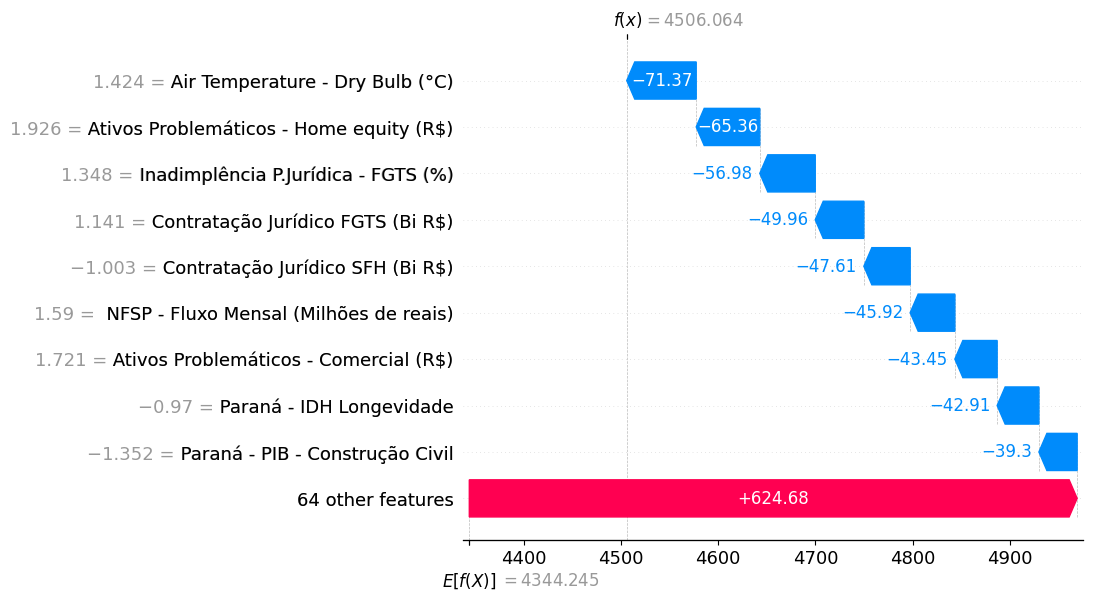

None

[[4341.82185714]](test_target) - [[4506.0645]](prediction) = [-164.24259598]


'-------------------------------------------------------------------'

1/1 [==============================] - 0s 34ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 491us/step


array([[  6.45570916,  11.88152985,   0.        ,  22.25052622,
        -42.01411019,  13.62001104,  26.64712348,   4.22994262,
        -34.63820476, -38.22966027,  10.67617166, -14.50194509,
          2.11185031, -31.54511808, -28.60334356, -47.84374044,
        -40.20416235, -32.38364973,  23.30709901,  17.50165182,
        -41.73912202,   7.61327243,  -5.61330918, -16.18886591,
         18.77572571,  16.88886023,  21.1437363 ,  30.97249966,
        -36.3200067 ,  25.44011741,  -4.54347744,  27.39668696,
          7.92640303,   4.76401183,   0.        ,  21.89344215,
          5.12177721, -51.6735258 ,  22.18522668,  26.35658919,
         15.5876871 ,  -5.93520363, -42.14197511,  17.93630978,
        -60.66465717, -13.44703459, -47.28013844,   0.        ,
         14.50952354,  26.61719364, -20.98909792,  27.93936303,
         30.19386027,  18.33556622,  24.89473899,  17.83827525,
         18.52711197,  12.94414856,  20.01498894,  24.18762633,
          5.79678816,   7.40464976,  11.

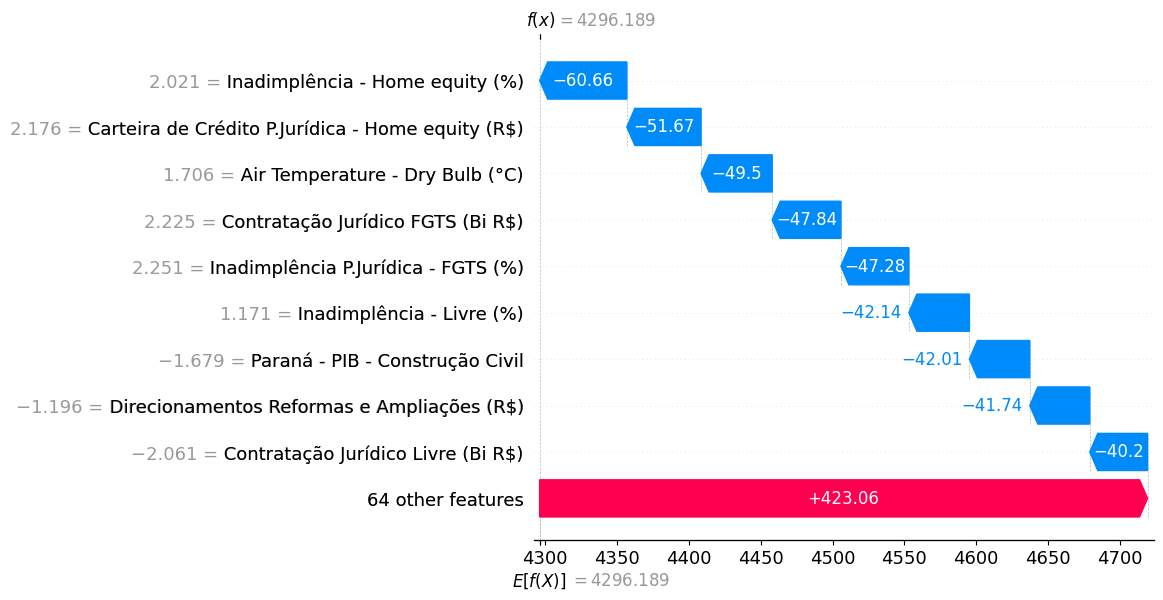

None

[[4108.78628571]](test_target) - [[4296.189]](prediction) = [-187.40267913]


'-------------------------------------------------------------------'

1/1 [==============================] - 0s 33ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 520us/step


array([[ 32.65293815,   0.        ,   0.        ,  41.00101205,
        -13.46800752,   0.        ,  49.86023412,   0.        ,
          0.        ,   0.        , -48.33963936, -90.04669304,
        -12.3472262 , -35.28070188,   0.        , -15.4391625 ,
        -53.92498792,   0.        ,   0.        ,   0.        ,
        -55.39704389,   0.        ,   0.        ,   0.        ,
        -24.59390825,   0.        ,  30.82327165, -26.21027102,
        -74.21246206, -63.26833848, -81.52568727,   0.        ,
          0.        ,   0.        ,   0.        ,  69.16522569,
          0.        , -27.90261279,   0.        ,   0.        ,
        -15.35834486, -38.8266524 , -37.10060738,   0.        ,
        -58.92937377, -57.09738179, -27.74650886, -83.4435533 ,
        -59.71951658,   0.        , -62.84255369,  44.33343861,
         26.34862112,  42.18754069,   0.        , -13.81678804,
          0.        , -23.01140791,   0.        ,   0.        ,
          0.        ,   0.        ,  -4.

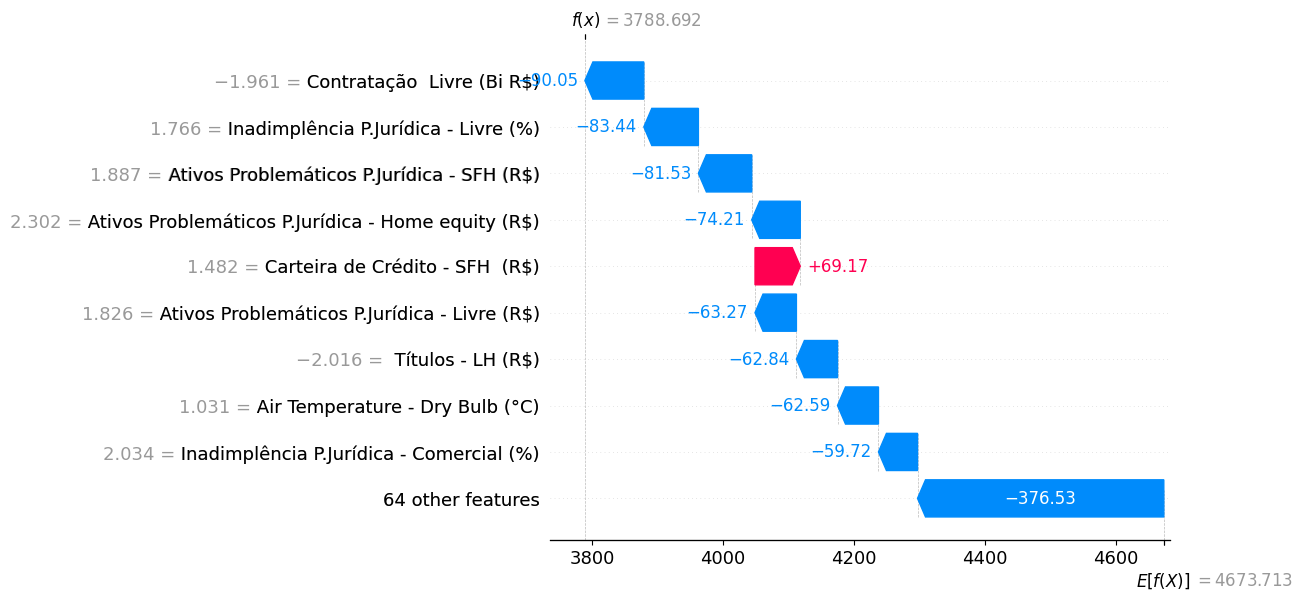

None

[[3869.33485714]](test_target) - [[3788.6921]](prediction) = [80.64271847]


'-------------------------------------------------------------------'

1/1 [==============================] - 0s 35ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 539us/step


array([[  0.        ,   0.        ,   0.        ,   0.        ,
         -6.07045814,   0.        ,   0.        , -14.54741537,
          0.        ,   0.        , -39.87251555, -49.82709877,
        -27.86638371,   0.        ,   0.        ,  -9.67957081,
        -39.49286239,   0.        ,   0.        ,   0.        ,
        -22.27955561,  -9.15370545,   0.        , -10.61243933,
        -19.26310088, -15.59066272,   0.        , -42.46992193,
        -45.40135705, -49.69252482, -58.40949923,   0.        ,
          0.        ,   0.        ,   0.        ,  46.00646637,
         -0.69852244,  -6.2451475 ,  -5.14478002,   0.        ,
          0.        , -34.81873001,  -4.93225846,  -0.20320773,
        -24.9724089 , -30.27122226, -22.01410269, -55.93473507,
        -14.81667167, -12.30700024, -17.61016732,   0.        ,
          0.        ,  34.52568919,  -8.83802444, -16.94108767,
         -2.67026823, -23.93483319,   0.        ,   0.        ,
          0.        ,  -6.81269905, -21.

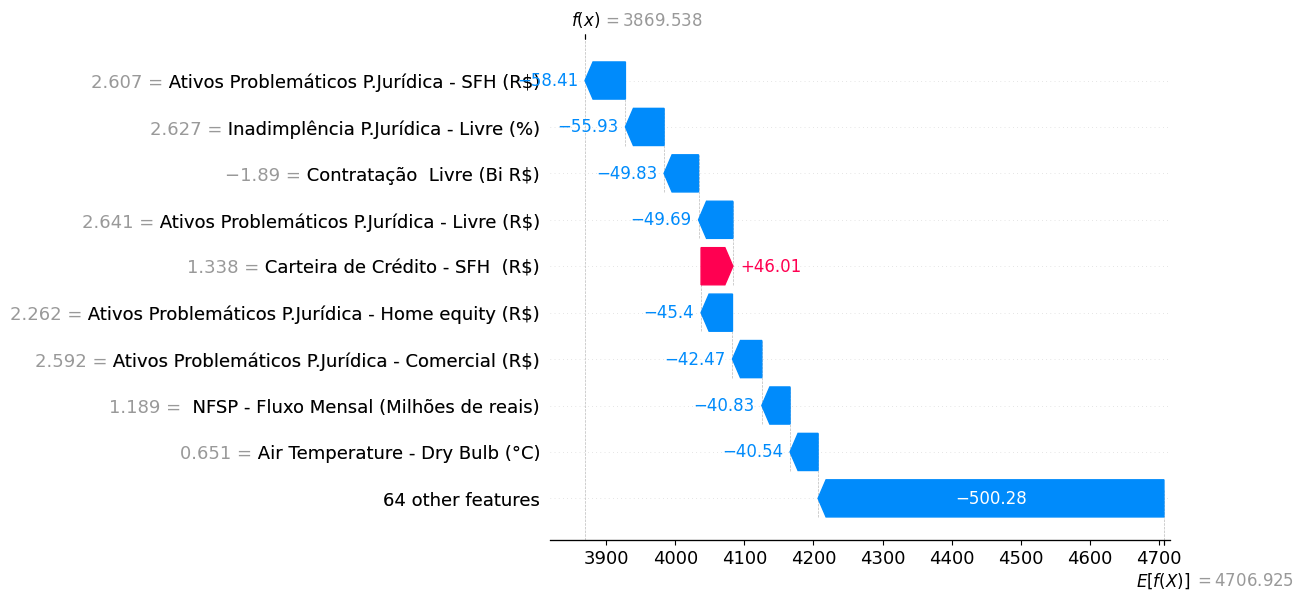

None

[[3764.518]](test_target) - [[3869.5383]](prediction) = [-105.02033008]


'-------------------------------------------------------------------'

1/1 [==============================] - 0s 34ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 530us/step


array([[  0.        ,   0.        ,   0.        ,   0.        ,
         -3.87176104,   0.        ,   0.        ,  -6.26770679,
          0.        ,   0.        , -18.9343255 , -11.17328118,
         -3.04010235,  -4.11694743,   0.        ,   0.        ,
        -14.04783807,   0.        ,   0.        ,   0.        ,
         -1.84014376,   0.        ,  -0.2616632 ,  -2.54016425,
         -8.74840684,   0.        ,   0.        , -14.78935424,
        -10.8803587 , -23.58777703,  -9.11533949,  -4.10175801,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  -1.01443347, -16.28676379,  -2.9554112 ,
          0.        , -12.13832813,   0.        ,   0.        ,
        -10.21269794,  -9.17292676, -10.77200663, -20.96373164,
         -8.56087586,  -2.26209808,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
         -8.66575377,   0.        ,  -4.

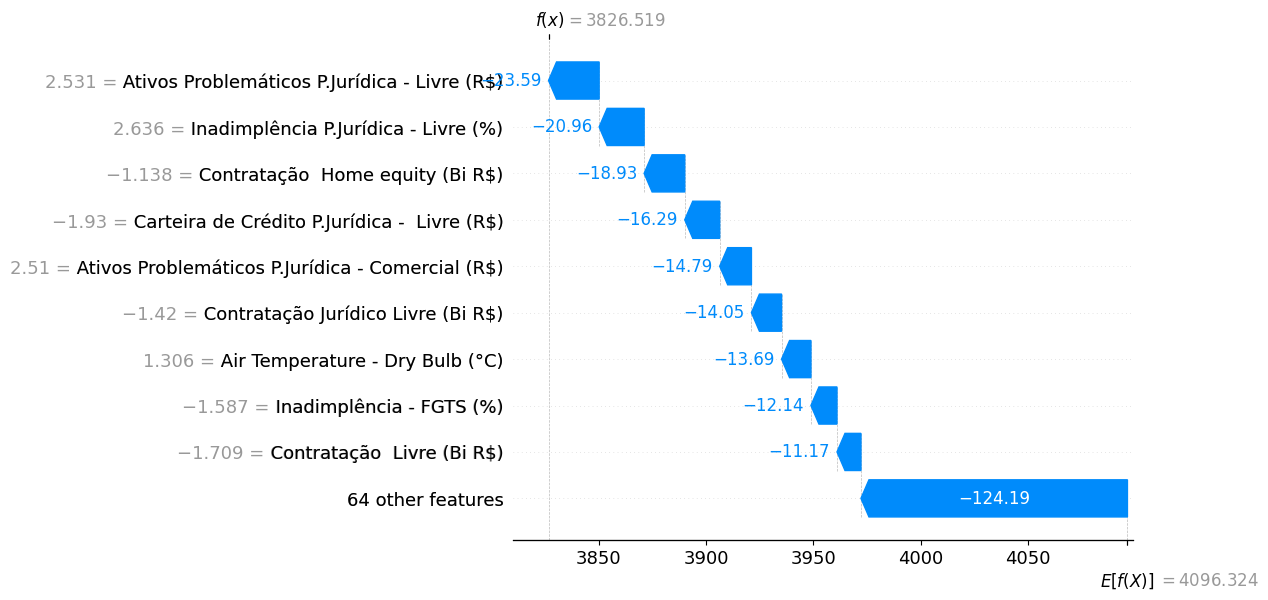

None

[[3773.354]](test_target) - [[3826.519]](prediction) = [-53.16504297]


'-------------------------------------------------------------------'

1/1 [==============================] - 0s 33ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 534us/step


array([[  0.        ,   0.        ,  -2.82013592,   0.        ,
         -4.62028553,  -2.91558066,   0.        , -13.66720915,
          0.        ,   0.        , -10.49509255, -14.3234959 ,
        -10.3888661 ,   0.        ,   0.        ,  -0.74530301,
        -20.87013691,  25.65823586,  -5.63966631,  -5.32421657,
         -2.34958762, -14.34565578,   0.        ,   0.        ,
        -11.83898805, -18.23638184,   0.        , -15.57612958,
        -15.00650055, -12.58177774, -11.07597019,  -3.20064515,
          0.        , -10.15030993,  -2.03530264,   0.        ,
         -7.25728017,   0.        ,   0.        ,   0.        ,
          0.        , -16.54430502,   0.        ,   0.        ,
          0.        ,  -5.91622758,  -9.66135257, -14.06826453,
         -3.12381928, -12.45900446,  -0.30044968,   0.        ,
          0.        ,  25.24864114,  -9.62108057, -12.71015281,
         -6.38434176, -14.14638982,  -5.38913765,   0.        ,
         -3.00210719,  -5.8660212 , -12.

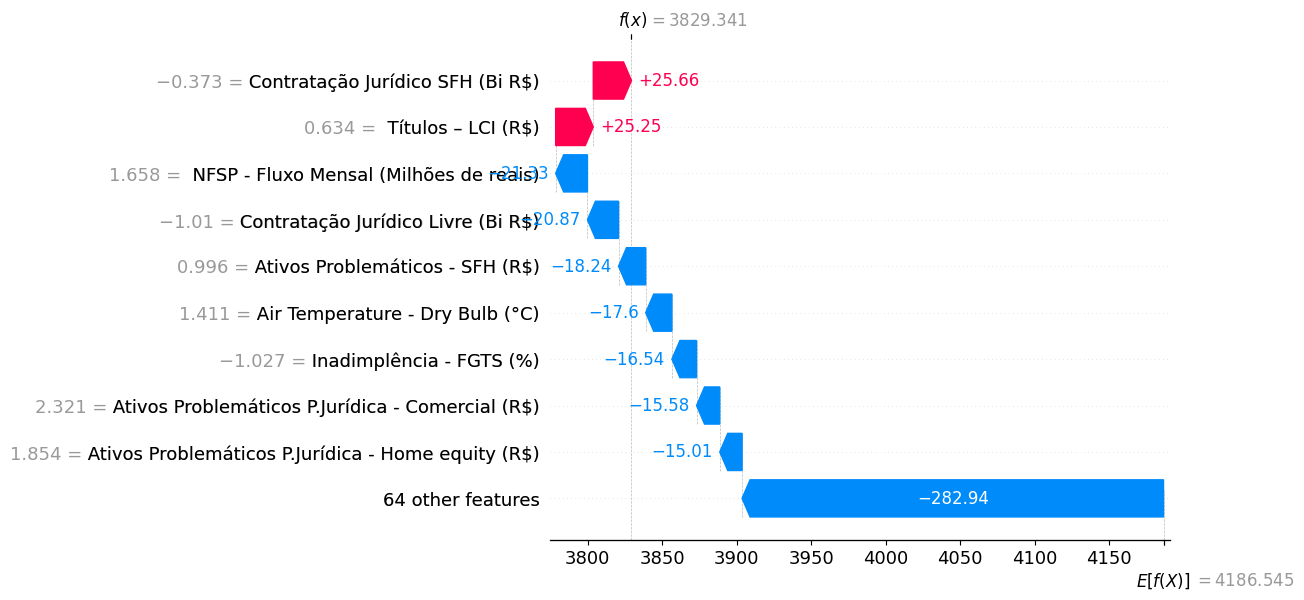

None

[[3786.974]](test_target) - [[3829.341]](prediction) = [-42.36706445]


'-------------------------------------------------------------------'

1/1 [==============================] - 0s 33ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 515us/step


array([[ 17.02345936,  -2.93841279,   0.        ,   0.        ,
         -5.68293687,  -8.02655666,  10.43991278, -11.97733758,
         -8.38361581,  11.00067945,   0.        , -15.36447902,
        -19.04251787,  26.14475178,  14.53539671,  -2.19140202,
        -21.64812022,   0.        ,  -9.62131864,  -2.1193092 ,
         -4.76759562, -17.98606045,   0.        , -24.89096231,
        -22.93244929, -18.95264882,   0.        , -14.81148416,
        -19.13748994, -10.74576041, -10.17665572,  -4.01141154,
          0.        , -12.82012559,  -1.71068548,   0.        ,
          0.        ,   0.        ,   0.        ,  11.92771341,
         12.87698073, -31.89974577,  17.1758117 ,  -7.49409251,
         -2.80638129,   0.        ,  -8.92236282, -17.50413367,
         -6.51548659,  -9.62654626,  -7.16450233,  26.42916072,
          0.        ,  18.17617307,  -7.5363571 , -16.73789593,
        -11.02912646, -16.54723531,  -4.24468152,   0.        ,
         -3.84266716,  -9.12874559, -11.

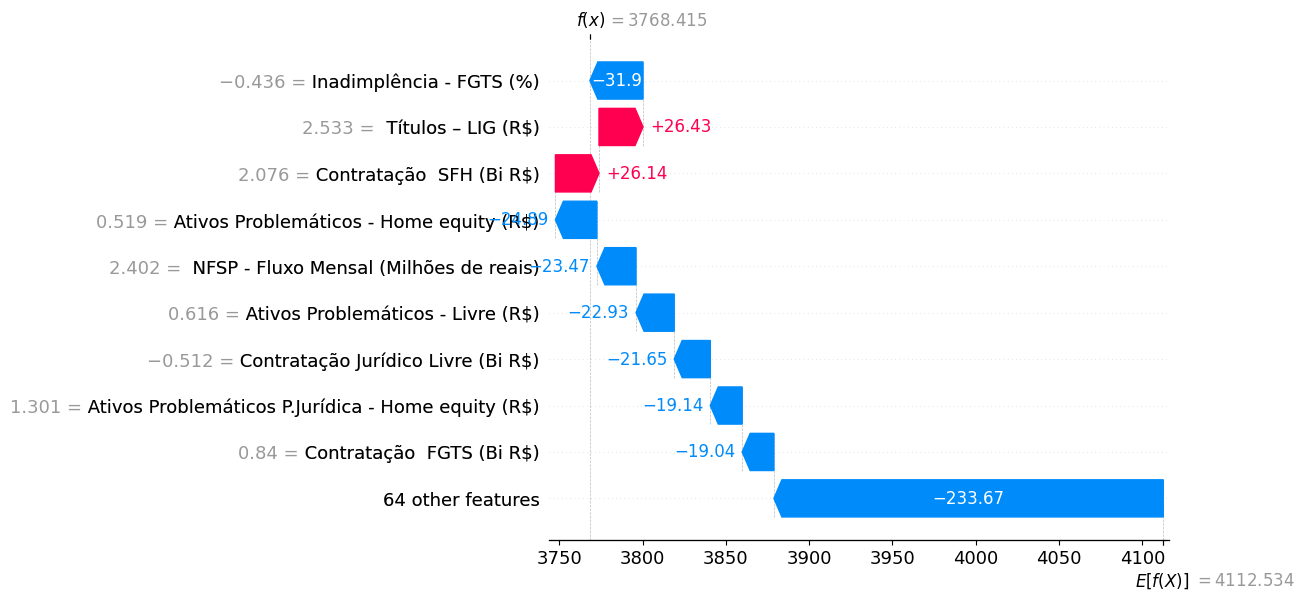

None

[[4235.532]](test_target) - [[3768.4153]](prediction) = [467.1167168]


'-------------------------------------------------------------------'

1/1 [==============================] - 0s 34ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 530us/step


array([[  0.        ,  -4.93140635,   0.        ,   0.        ,
          0.        ,  -8.91495699,   0.        ,  -1.88500738,
          0.        ,   0.        , -14.18684693,   0.        ,
          0.        , -12.39264357,   0.        ,   0.        ,
         -8.3018863 ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  -2.28391726,   0.        ,  -6.50307554,
          0.        ,  -1.67029486,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
         -2.92209079,   0.        ,   0.        ,   0.        ,
         -3.07167056,  -5.86084406, -19.58382175,   0.        ,
        -16.76745283,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,  -4.72347678,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.

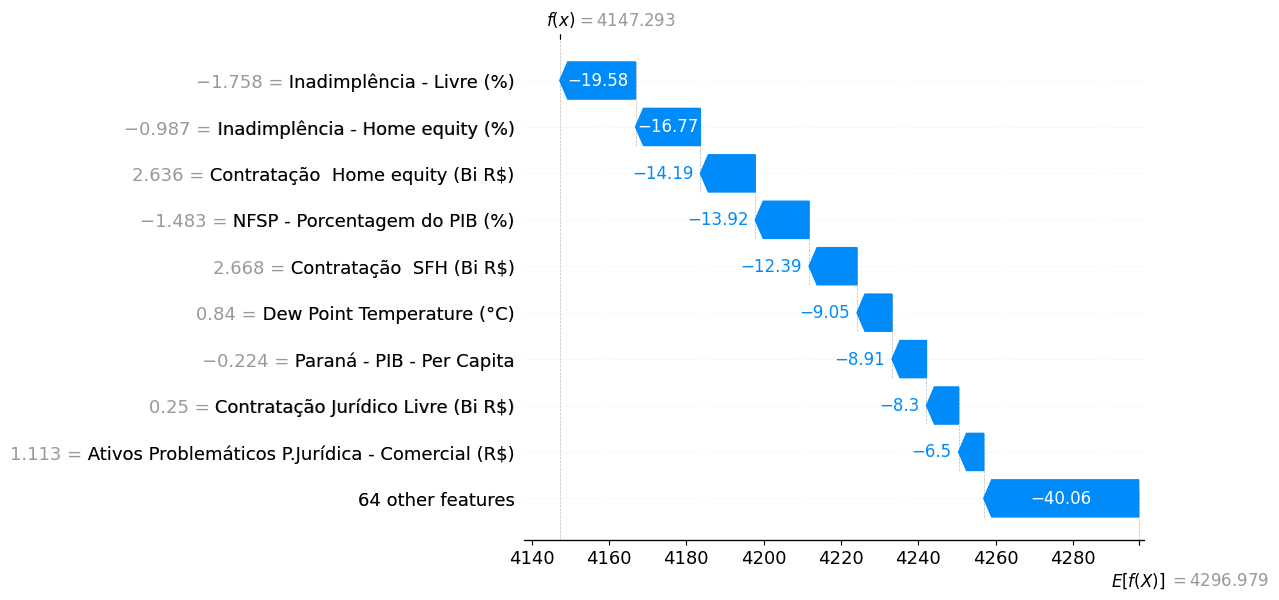

None

[[4784.413]](test_target) - [[4147.2935]](prediction) = [637.11954297]


'-------------------------------------------------------------------'

[4174.923828125,
 4349.69873046875,
 4506.064453125,
 4296.18896484375,
 3788.692138671875,
 3869.538330078125,
 3826.51904296875,
 3829.341064453125,
 3768.415283203125,
 4147.29345703125]

In [91]:
predictions, targets, shap_calc = model_time_series_mae_tester(data.iloc[:-1,:], 4, winner_seed)
predictions

In [92]:
shap_calc

array([104.39252944,  23.61327933,  46.15268089, 108.58204515,
       127.94179168,  69.15241336, 119.17480954, 147.1016823 ,
        93.45048011,  86.2821124 , 240.83850063, 270.51245832,
       122.70311278, 105.10106863,  85.56586478, 145.36694822,
       260.03212774, 139.27466084,  73.64895791,  76.87342122,
       156.33833953, 100.93233084,  82.9550052 ,  94.09374651,
       131.72612001, 119.8026757 ,  92.77206092, 234.57080904,
       267.96931318, 234.64455142, 262.67158697,  80.29007489,
        45.32655767, 100.30902841,  34.59374744, 185.75517616,
        62.95362875, 140.8895437 ,  87.8725827 ,  75.1856851 ,
        52.29259096, 131.24296959,  98.9534328 ,  71.38223438,
       219.54453883, 175.59140175, 217.77438649, 245.02399478,
       137.28823733, 112.81365249, 140.94212717, 117.65909488,
       115.11221644, 162.75724999,  92.39122325, 126.20960707,
        51.79962633, 156.94095654,  69.32619035,  69.39686802,
        52.93402414,  45.51433687, 153.63197421, 247.67

In [93]:
shap_vector = pd.DataFrame([shap_calc], columns=test_input.columns)
shap_vector

,Paraná - Desemprego,Paraná - IDH,Paraná - IDH Renda,Paraná - PIB - Estadual,Paraná - PIB - Construção Civil,Paraná - PIB - Per Capita,Paraná - PIB - Preços de Mercado,Paraná - IDH Educacao,Paraná - IDH Longevidade,Contratação Comercial (Bi R$),...,NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),Taxa Selic (%),Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s)
0,104.392529,23.613279,46.152681,108.582045,127.941792,69.152413,119.17481,147.101682,93.45048,86.282112,...,247.670189,102.489746,41.458658,136.509385,51.166631,134.630834,320.470055,191.008522,65.262838,96.647777


In [94]:
asc_shap_vector = shap_vector.iloc[0].sort_values()
asc_shap_vector = pd.DataFrame([asc_shap_vector.values], columns=asc_shap_vector.index)
asc_shap_vector

,Paraná - IDH,Carteira de Crédito - FGTS (R$),Taxa Selic (%),Carteira de Crédito – Home equity (R$),Quantidade de imóves – Isolado,Paraná - IDH Renda,Atmospheric Pressure(mB),Número de Apartamentos,Inadimplência - SFH (%),Quantidade de imóves - Condomínio,...,Ativos Problemáticos P.Jurídica - Comercial (R$),Ativos Problemáticos P.Jurídica - Livre (R$),Contratação Home equity (Bi R$),Inadimplência P.Jurídica - Livre (%),NFSP - Fluxo Mensal (Milhões de reais),Contratação Jurídico Livre (Bi R$),Ativos Problemáticos P.Jurídica - SFH (R$),Ativos Problemáticos P.Jurídica - Home equity (R$),Contratação Livre (Bi R$),Air Temperature - Dry Bulb (°C)
0,23.613279,34.593747,41.458658,45.326558,45.514337,46.152681,51.166631,51.799626,52.292591,52.934024,...,234.570809,234.644551,240.838501,245.023995,247.670189,260.032128,262.671587,267.969313,270.512458,320.470055


In [95]:
mae = mean_absolute_error(predictions, targets)
mae

231.41391322544638

In [96]:
porcentage = mae/np.mean(targets)
porcentage

0.05540669244960798